In [20]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from torchvision import models
from netlens.modules import FlatModel
from netlens.data import *
from netlens.image_proc import *
from netlens.visualization import OptVis, ImageParam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
IMAGE_PATH = '../../images/examples/'

In [22]:
network = models.vgg11(pretrained=True)
network.to('cuda' if torch.cuda.is_available() else 'cpu');

In [23]:
network

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [24]:
model = FlatModel.from_nested_cnn(network)

In [25]:
model.summary()

  IDX | KEY                       | LAYER
--------------------------------------------------------------------------------
    0 | features-conv-0           | Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    1 | features-relu-0           | ReLU()
    2 | features-pool-0           | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    3 | features-conv-1           | Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    4 | features-relu-1           | ReLU()
    5 | features-pool-1           | MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    6 | features-conv-2           | Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    7 | features-relu-2           | ReLU()
    8 | features-conv-3           | Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    9 | features-relu-3           | ReLU()
   10 | features-pool-2           | MaxPool2d(kernel_size=2, stride=2, 

## Class Visualisations

First we generate visualisations of the classes. To change the class selected, simply change the value of `neuron`.

We parameterise the input noise in the colour decorrelated, Fourier domain. This helps create better visualisations. For more, see: https://distill.pub/2017/feature-visualization/

Run [50], loss=0.3482
Run [100], loss=-0.1323
Run [150], loss=-0.1426
Run [200], loss=-0.1421
Run [250], loss=-0.1411


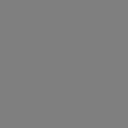

Run [300], loss=-0.1405
Run [350], loss=-0.1395
Run [400], loss=-0.1384
Run [450], loss=-0.1380
Run [500], loss=-0.1371


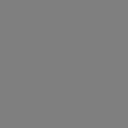

In [26]:
# Select a layer from the network
layer = 'classifier-linear-2'
neuron = 5

# Create an OptVis object from a PyTorch model
optvis = OptVis.from_activations(model, layer=layer, neuron=neuron, optim_params={'lr': 0.05, 'weight_decay': 5.0})

# Parameterise input noise raw
img_param = ImageParam(size=128, fft=False, decorrelate=False)

# Create visualisation
output = optvis.vis(img_param, thresh=(250, 500), transform=False, verbose=True, show=True)

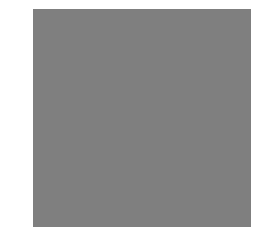

In [27]:
show_image(output)

In [ ]:
# Parameterise input noise in colour decorrelated Fourier domain
img_param = ImageParam(size=128, fft=True, decorrelate=True)

# Create visualisation
output = optvis.vis(img_param, thresh=(250, 500), transform=True, verbose=True, show=True)

## Channel Visualisations

Now let's generate some visualisations of the channels of the convolutional layers of the network. We can see the names and number of channels of each layer by using the `get_layer_names()` method. We can then generate channel visualisations in the same way.

In [ ]:
# Select a layer from the network
layer = 'features-conv-6'

# Choose a channel that is within the size of the layer
channel = 32

# Create an OptVis object from a PyTorch model
optvis = OptVis.from_activations(model, layer=layer, channel=channel, optim_params={'lr': 0.05, 'weight_decay': 0.03})

# Parameterise input noise raw
img_param = ImageParam(size=224, fft=False, decorrelate=False)

# Create visualisation
output = optvis.vis(img_param, thresh=(250, 500), transform=False, verbose=True, show=True)

In [ ]:
# Parameterise input noise in colour decorrelated Fourier domain
img_param = ImageParam(size=224, fft=True, decorrelate=True)

# Create visualisation
output = optvis.vis(img_param, thresh=(250, 500), transform=True, verbose=True, show=True)